In [35]:
from tensorflow import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from keras.datasets import mnist
from keras.preprocessing import image
from keras.utils import to_categorical

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
X_train.shape

(60000, 28, 28)

### Visualize the first 9 digit images in our training set

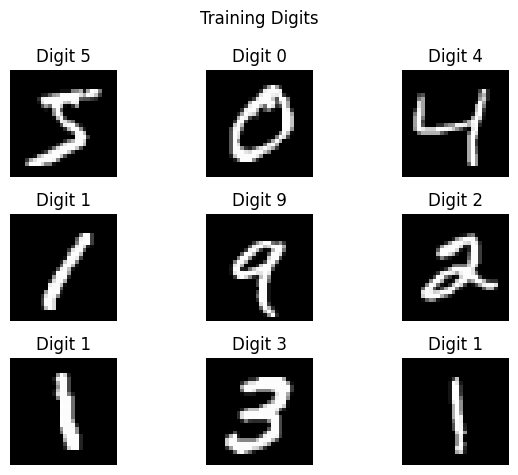

In [3]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Digit {y_train[i]}")
    plt.axis('off')

plt.suptitle("Training Digits")
plt.tight_layout()
plt.show()

### Some preprocessing

In [4]:
# Normalizing data
X_train, X_valid = X_train/255, X_valid/255
X_train[0:4]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [5]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Deep learning - modelling

In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28,)),
    Dense(256, activation='relu'),
    Dropout(rate=0.25),
    Dense(256, activation='relu'),
    Dropout(rate=0.25),
    Dense(10, activation='softmax'),
])

In [7]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics = ["categorical_accuracy", "top_k_categorical_accuracy"]
)

In [8]:
early_stopping = EarlyStopping(
    min_delta = 0.002,
    patience = 25,
    restore_best_weights = True
)

In [9]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size=5000, 
    epochs=500,
    callbacks=early_stopping,
    verbose=0
)

In [10]:
history_df = pd.DataFrame(history.history)

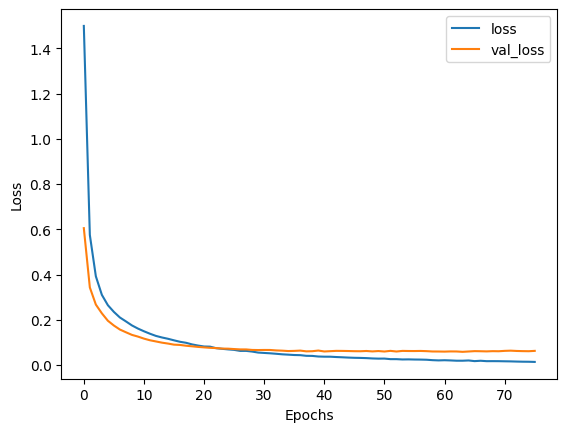

In [11]:
history_df[["loss", "val_loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

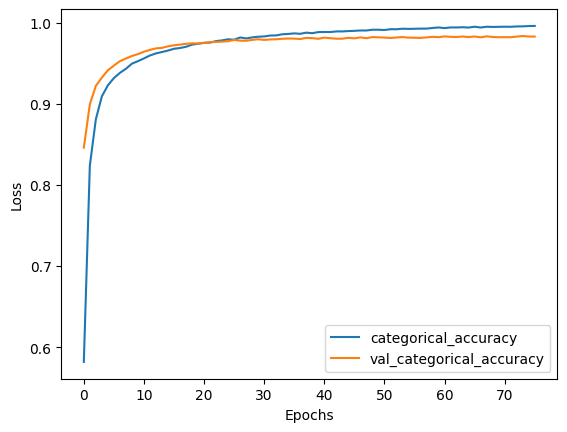

In [12]:
history_df[["categorical_accuracy", "val_categorical_accuracy"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [13]:
history_df

,loss,categorical_accuracy,top_k_categorical_accuracy,val_loss,val_categorical_accuracy,val_top_k_categorical_accuracy
0,1.499432,0.582000,0.890933,0.605122,0.8459,0.9864
1,0.575148,0.823733,0.986200,0.342939,0.8993,0.9930
2,0.392280,0.880817,0.992083,0.267147,0.9220,0.9953
3,0.310158,0.909050,0.994517,0.228472,0.9322,0.9968
4,0.264388,0.922633,0.995967,0.195625,0.9412,0.9974
...,...,...,...,...,...,...
71,0.015889,0.994783,1.000000,0.063297,0.9819,0.9999
72,0.015117,0.995183,1.000000,0.061977,0.9827,0.9999
73,0.014526,0.995283,1.000000,0.061282,0.9834,0.9999
74,0.014282,0.995700,1.000000,0.060883,0.9828,0.9999


### Okay since our model is validated and proven accurate, let's predict with it now

##### Lets get image of handwitten digits and then predict their values

!['number 5](images/three.png)
!['number 9](images/eight.png)

In [154]:
three = image.load_img("images/three.png", color_mode="grayscale", target_size=(28, 28))
five = image.load_img("images/five.png", color_mode="grayscale", target_size=(28, 28))
eight = image.load_img("images/eight.png", color_mode="grayscale", target_size=(28, 28))
nine = image.load_img("images/nine.png", color_mode="grayscale", target_size=(28, 28))

In [155]:
nine

In [156]:
three_array = image.img_to_array(three)
five_array = image.img_to_array(five)
eight_array = image.img_to_array(eight)
nine_array = image.img_to_array(nine)

three_array = three_array[:, :, 0]/255
five_array = five_array[:, :, 0]/255
eight_array = eight_array[:, :, 0]/255
nine_array = nine_array[:, :, 0]/255

three_array.shape         # Okay takes a 28 x 28 array shape now

(28, 28)

### Lets play around a lil' bit visualizing our numerics

(-0.5, 27.5, 27.5, -0.5)

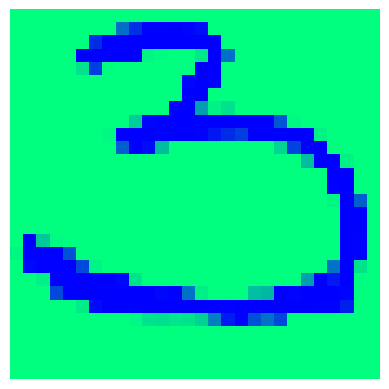

In [128]:
plt.imshow(three_array, cmap='winter')
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

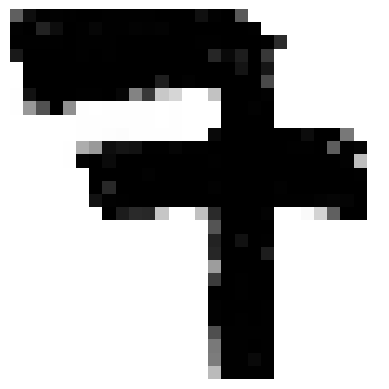

In [157]:
plt.imshow(nine_array, cmap='gray')
plt.axis("off")

In [51]:
five_array.shape

(28, 28)

### Lets finally predict

In [158]:
# Before e predict lets expand dimensions to transform it to 3D where predictions can be made
three_array = np.expand_dims(three_array, axis=0)
five_array = np.expand_dims(five_array, axis=0)
eight_array = np.expand_dims(eight_array, axis=0)
nine_array = np.expand_dims(nine_array, axis=0)

nine_array.ndim

3

In [78]:
eight_array.shape

(1, 28, 28)

In [161]:
model.predict(nine_array).argmax()

1/1 [==============================] - 0s 26ms/step


5

1/1 [==============================] - 0s 212ms/step


Text(0.5, 1.0, '6')

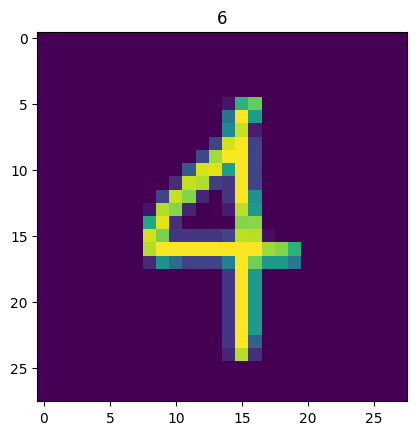

In [153]:
plt.imshow(X_valid[159])
plt.title(model.predict(np.expand_dims(X_valid[159], axis=0)).argmax())